**The objective of this project is to classify image with maximum accuarcy on the basis of Transfer Learning combined with Fined Tuning**

We are using pre-trained Neural Network on Monkey dataset using so-called Transfer Learning, by re-routing the output of the original model just prior to its classification layers and instead use a new classifier that we had created. Because the original model was 'frozen' its weights could not be further optimized, so whatever had been learned by all the previous layers in the model, could not be fine-tuned to the new data-set.

****IMPORTING LIBRARIES**
**

In [0]:
import numpy as np # linear algebra
import pandas as pd

In [0]:
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.python.keras.optimizers import Adam, RMSprop
from tensorflow.python.keras.preprocessing  import image
from tensorflow.python.keras.preprocessing  import image


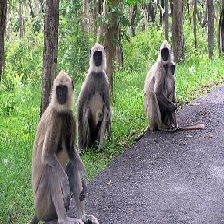

In [73]:
img_path = 'training/n9/n9014.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img

**IMPORTING DATASET**

In [74]:
from zipfile import ZipFile
file_name  = "10-monkey-species.zip"

with ZipFile(file_name,"r") as zip:
  zip.extractall()
  print('Done')

Done


**Training and Validation files uploaded**

**Defining PATH**

In [75]:
from zipfile import ZipFile
file_name  = "training.zip"

with ZipFile(file_name,"r") as zip:
  zip.extractall()
  print('Done')

Done


In [76]:
from zipfile import ZipFile
file_name  = "validation.zip"

with ZipFile(file_name,"r") as zip:
  zip.extractall()
  print('Done')

Done


**Creating Train and Test Directory path**

In [0]:
train_dir =  'training'
val_dir  =  'validation'

**Plot Images**

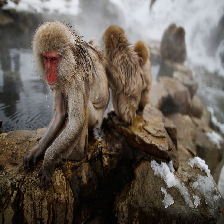

In [78]:
img_path = 'training/n3/n3025.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img

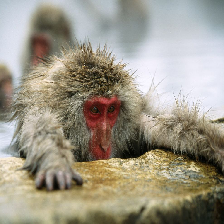

In [79]:
img_path = 'training/n3/n3039.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img

**Importing monkey labels to check no.of classes**

In [80]:
labels = pd.read_csv("monkey_labels.txt")
num_classes = labels['Label'].size
labels

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


**Input Pipeline for our Network**

In [0]:
IMAGE_WIDTH = 300
IMAGE_HEIGHT = 300


**DATA GENERATOR**

Keras uses a so-called data-generator for inputting data into the neural network, which will loop over the data for eternity.


**Data Generator for Train and Test with NO TRANSFORMATIONS**

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.xception import preprocess_input



train_data_gen=ImageDataGenerator(
                              preprocessing_function=preprocess_input)

validation_data_gen=ImageDataGenerator(
                                       preprocessing_function=preprocess_input
                                      )

**Batch_Size **

Data Generators processes and returns  images in batches.
Batch sizes should be small for faster processing

In [0]:
BATCH_SIZE = 20


In [84]:
train_gen =train_data_gen.flow_from_directory(train_dir,
                                            target_size=(IMAGE_WIDTH,
                                                       IMAGE_HEIGHT),
                                            batch_size=BATCH_SIZE,
                                            shuffle=True,
                                            class_mode="categorical")
val_gen = validation_data_gen.flow_from_directory(val_dir, 
                                                    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT), 
                                                    batch_size = BATCH_SIZE, 
                                                    
                                                    class_mode="categorical")

Found 1097 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [0]:
train_count=1097#train_size
val_count=272#test_size

**IMPORTING VGG 16 PRETRAINED WEIGHTS**

In [0]:
from google.colab import files

In [0]:
from keras.applications import Xception


**MODEL SET UP**

In [0]:
Xception_model = Xception(include_top=False, 
                      pooling='avg', 
                      weights='xception_weights_tf_dim_ordering_tf_kernels_notop.h5'
                     )

In [90]:
Xception_model.layers

We can see that the last layer in the  convolutional layer is is GlobalAveragePooling2D

We wiil be building our Transfer Learning model on top of this layer 

Adding 1 layer of FULLY ONNECTED LAYER with Drop-out and

a classification layer with softmax with  10 output classses

In [0]:
from keras.applications import Xception
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout

# set  up the model
model=Sequential()
# add xception pretrained model, the wieghts 80Mb
model.add(Xception(include_top=False, 
                      pooling='avg', 
                      weights='xception_weights_tf_dim_ordering_tf_kernels_notop.h5'
                     ))
# use relu as activation function "vanishing gradiends" :)
model.add(Dense(512, activation="relu"))  
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

Using dropout layer to minimize overfitting


Dropout(0.5) --------Dropping a neuron with 0.5 probability gets the highest variance for this distribution

**Freezing the PRETRAINED LAYER**

In [0]:
model.layers[0].trainable=False

**SUMMARY OF TENSORS FLOWING b/w  the VGG_16 Layers**

In [93]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 2048)              20861480  
_________________________________________________________________
dense_16 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 21,915,698
Trainable params: 1,054,218
Non-trainable params: 20,861,480
_________________________________________________________________


**COMPILING MODEL**

In [0]:
# from keras import optimizers
# adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
# use adam to avoid overfitting

model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])

**TRAIN MODEL**

In [95]:
model_history = model.fit_generator(train_gen,
                                    steps_per_epoch=5,
                                    epochs=10,
                                    validation_data=val_gen,
                                    validation_steps=val_count // BATCH_SIZE
                                   )

Epoch 1/10
5/5 [==============================] - 36s 7s/step - loss: 2.0157 - acc: 0.3000 - val_loss: 1.4261 - val_acc: 0.7462
Epoch 2/10
5/5 [==============================] - 10s 2s/step - loss: 1.1064 - acc: 0.7500 - val_loss: 0.8812 - val_acc: 0.8413
Epoch 3/10
5/5 [==============================] - 11s 2s/step - loss: 0.6131 - acc: 0.8400 - val_loss: 0.4278 - val_acc: 0.9365
Epoch 4/10
5/5 [==============================] - 12s 2s/step - loss: 0.5928 - acc: 0.8100 - val_loss: 0.3396 - val_acc: 0.9127
Epoch 5/10
5/5 [==============================] - 12s 2s/step - loss: 0.3668 - acc: 0.9000 - val_loss: 0.4555 - val_acc: 0.8135
Epoch 6/10
5/5 [==============================] - 12s 2s/step - loss: 0.4468 - acc: 0.8500 - val_loss: 0.3165 - val_acc: 0.9127
Epoch 7/10
5/5 [==============================] - 12s 2s/step - loss: 0.3261 - acc: 0.9000 - val_loss: 0.1948 - val_acc: 0.9484
Epoch 8/10
5/5 [==============================] - 11s 2s/step - loss: 0.2343 - acc: 0.9200 - val_loss: 0

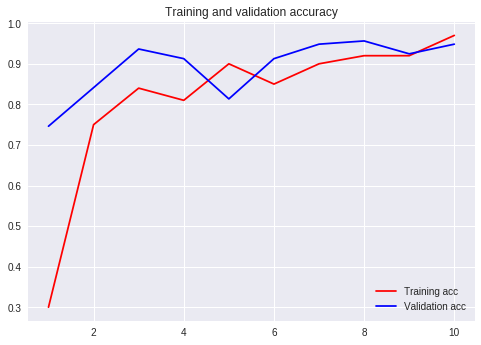

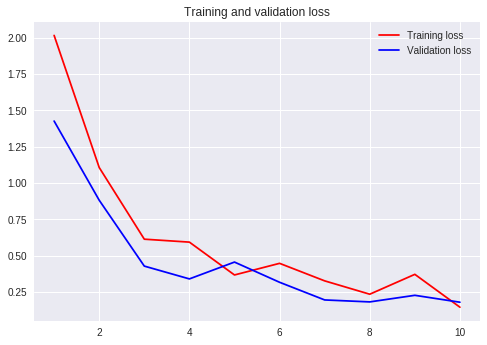

In [96]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

**DATA AUGMENTATION**

We have a small training-set so it helps to artificially inflate its size by making various transformations to the images. We use a built-in data-generator that can make these random transformations.

** DATA GENERATOR FOR TRAIN**

In [0]:
train_data_gen_aug=ImageDataGenerator(
                              preprocessing_function=preprocess_input,
                              rotation_range=180,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest'
                              
                             )

**DATA GENERATOR FOR TEST with no Transformations**

   No transformations should be performed on the test set since we to predict the exact classification accuarcy on these images
    

In [0]:
validation_data_gen=ImageDataGenerator(
                                       preprocessing_function=preprocess_input
                                      )

In [99]:
train_gen_aug=train_data_gen_aug.flow_from_directory(train_dir,
                                            target_size=(IMAGE_WIDTH,
                                                       IMAGE_HEIGHT),
                                            batch_size=BATCH_SIZE,
                                            shuffle=True,
                                            class_mode="categorical")
val_gen_aug = validation_data_gen.flow_from_directory(val_dir, 
                                                    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT), 
                                                    batch_size = BATCH_SIZE, 
                                                    
                                                    class_mode="categorical")

Found 1097 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


**BUILD MODEL**

In [0]:
model_aug=Sequential()
# add xception pretrained model, the wieghts 80Mb
model_aug.add(Xception(include_top=False, 
                      pooling='avg', 
                      weights='xception_weights_tf_dim_ordering_tf_kernels_notop.h5'
                     ))
# use relu as activation function "vanishing gradiends" :)
model_aug.add(Dense(512, activation="relu"))  
# add drop out to avoid overfitting
model_aug.add(Dropout(0.5))
model_aug.add(Dense(num_classes, activation="softmax"))

**FREEZING Pretrained Layers**

In [0]:
model_aug.layers[0].trainable=False


In [102]:
model_aug.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 2048)              20861480  
_________________________________________________________________
dense_18 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 21,915,698
Trainable params: 1,054,218
Non-trainable params: 20,861,480
_________________________________________________________________


**COMPILE MODEL**

In [0]:
model_aug.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])

**TRANING MODEL**

In [104]:
model_aug_history = model_aug.fit_generator(train_gen_aug,
                                    steps_per_epoch=5,
                                    epochs=10,
                                    validation_data=val_gen_aug,
                                    validation_steps=val_count // BATCH_SIZE
                                   )

Epoch 1/10
5/5 [==============================] - 40s 8s/step - loss: 2.3205 - acc: 0.1900 - val_loss: 1.9152 - val_acc: 0.4077
Epoch 2/10
5/5 [==============================] - 12s 2s/step - loss: 2.1766 - acc: 0.2700 - val_loss: 1.4643 - val_acc: 0.6984
Epoch 3/10
5/5 [==============================] - 14s 3s/step - loss: 1.5161 - acc: 0.4500 - val_loss: 1.1097 - val_acc: 0.8611
Epoch 4/10
5/5 [==============================] - 12s 2s/step - loss: 1.3395 - acc: 0.5500 - val_loss: 0.8654 - val_acc: 0.8175
Epoch 5/10
5/5 [==============================] - 13s 3s/step - loss: 1.2413 - acc: 0.5900 - val_loss: 0.6409 - val_acc: 0.8611
Epoch 6/10
5/5 [==============================] - 13s 3s/step - loss: 0.9133 - acc: 0.7400 - val_loss: 0.5580 - val_acc: 0.9087
Epoch 7/10
5/5 [==============================] - 13s 3s/step - loss: 1.0057 - acc: 0.6700 - val_loss: 0.5096 - val_acc: 0.8968
Epoch 8/10
5/5 [==============================] - 11s 2s/step - loss: 0.8999 - acc: 0.7200 - val_loss: 0

**ACCURACY and LOSS**

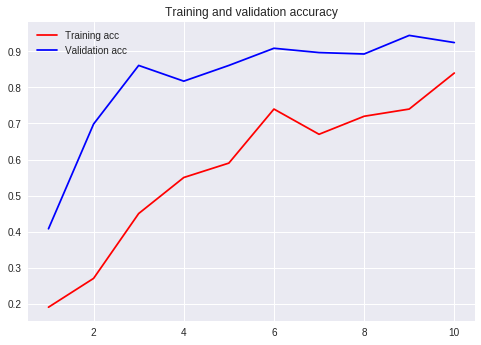

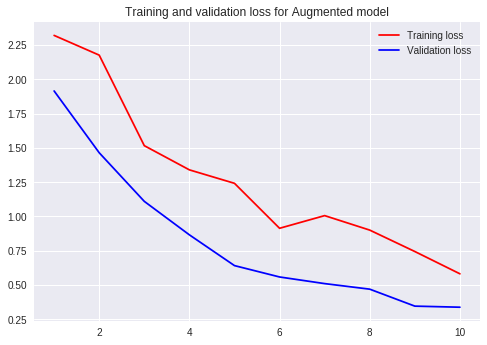

In [105]:
acc =  model_aug_history.history['acc']
val_acc = model_aug_history.history['val_acc']
loss = model_aug_history.history['loss']
val_loss = model_aug_history.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss for Augmented model')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

**Removing Drop-out Layer**

We will accessing performance  by removing the dropout layer  on the basis of validation accuracy

In [0]:
from keras.applications import Xception
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout

# set  up the model
model_NoDropOut=Sequential()
# add xception pretrained model, the wieghts 80Mb
model_NoDropOut.add(Xception(include_top=False, 
                      pooling='avg', 
                      weights='xception_weights_tf_dim_ordering_tf_kernels_notop.h5'
                     ))
# use relu as activation function "vanishing gradiends" :)
model_NoDropOut.add(Dense(512, activation="relu"))  
# add drop out to avoid overfitting
#model_NoDropOut.add(Dropout(0.5))
model_NoDropOut.add(Dense(num_classes, activation="softmax"))

****FREEZING Pretrained Layers****

In [0]:
# do not need to train the pre train layer
model_NoDropOut.layers[0].trainable=False

In [108]:
model_NoDropOut.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 2048)              20861480  
_________________________________________________________________
dense_20 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 21,915,698
Trainable params: 1,054,218
Non-trainable params: 20,861,480
_________________________________________________________________


**COMPILE MODEL**

In [0]:
# from keras import optimizers
# adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
# use adam to avoid overfitting

model_NoDropOut.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])

**TRAIN MODEL**

In [110]:
model_NoDropOut_history = model_NoDropOut.fit_generator(train_gen,
                                    steps_per_epoch=5,
                                    epochs=10,
                                    validation_data=val_gen,
                                    validation_steps=val_count // BATCH_SIZE
                                   )

Epoch 1/10
5/5 [==============================] - 41s 8s/step - loss: 1.7228 - acc: 0.5100 - val_loss: 1.1980 - val_acc: 0.7222
Epoch 2/10
5/5 [==============================] - 10s 2s/step - loss: 0.7909 - acc: 0.8100 - val_loss: 0.4997 - val_acc: 0.9365
Epoch 3/10
5/5 [==============================] - 12s 2s/step - loss: 0.3594 - acc: 0.9000 - val_loss: 0.5237 - val_acc: 0.8175
Epoch 4/10
5/5 [==============================] - 11s 2s/step - loss: 0.4397 - acc: 0.8400 - val_loss: 0.2229 - val_acc: 0.9444
Epoch 5/10
5/5 [==============================] - 12s 2s/step - loss: 0.2557 - acc: 0.9100 - val_loss: 0.1415 - val_acc: 0.9722
Epoch 6/10
5/5 [==============================] - 12s 2s/step - loss: 0.2186 - acc: 0.9200 - val_loss: 0.2537 - val_acc: 0.9269
Epoch 7/10
5/5 [==============================] - 10s 2s/step - loss: 0.1495 - acc: 0.9400 - val_loss: 0.2105 - val_acc: 0.9286
Epoch 8/10
5/5 [==============================] - 10s 2s/step - loss: 0.1344 - acc: 0.9600 - val_loss: 0

**ACCURACY FALLS**

**Accuracy vs Loss**

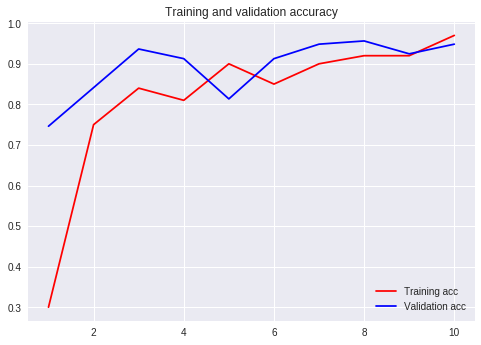

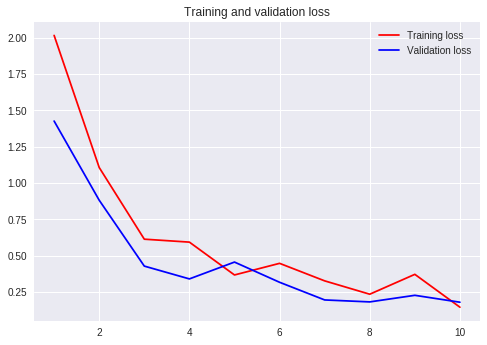

In [111]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()


**Add 1 more Fully Connected Layer**

In [0]:
from keras.applications import Xception
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout

# set  up the model
model_FC=Sequential()
# add xception pretrained model, the wieghts 80Mb
model_FC.add(Xception(include_top=False, 
                      pooling='avg', 
                      weights='xception_weights_tf_dim_ordering_tf_kernels_notop.h5'
                     ))
# use relu as activation function "vanishing gradiends" :)
model_FC.add(Dense(512, activation="relu"))  
# add drop out to avoid overfitting
model_FC.add(Dropout(0.5))#Dropping a neuron with 0.5 probability gets the highest variance for this distribution. 
model_FC.add(Dense(512, activation="relu"))  
# add drop out to avoid overfitting
model_FC.add(Dropout(0.5))
model_FC.add(Dense(num_classes, activation="softmax"))

**FREEZING Pretrained Layers**

In [0]:
# do not need to train the pre train layer
model_FC.layers[0].trainable=False

In [114]:
model_FC.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 2048)              20861480  
_________________________________________________________________
dense_22 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total params: 22,178,354
Trainable params: 1,316,874
Non-trainable params: 20,861,480
________________________________________________________

In [115]:
model_FC.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 2048)              20861480  
_________________________________________________________________
dense_22 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total params: 22,178,354
Trainable params: 1,316,874
Non-trainable params: 20,861,480
________________________________________________________

**COMPILE MODEL**

In [0]:
# from keras import optimizers
# adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
# use adam to avoid overfitting

model_FC.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])

**TRAIN MODEL**

In [117]:
model_FC_history = model.fit_generator(train_gen,
                                    steps_per_epoch=5,
                                    epochs=10,
                                    validation_data=val_gen,
                                    validation_steps=val_count // BATCH_SIZE
                                   )

Epoch 1/10
5/5 [==============================] - 40s 8s/step - loss: 0.2263 - acc: 0.9200 - val_loss: 0.1809 - val_acc: 0.9603
Epoch 2/10
5/5 [==============================] - 10s 2s/step - loss: 0.1723 - acc: 0.9400 - val_loss: 0.1193 - val_acc: 0.9881
Epoch 3/10
5/5 [==============================] - 13s 3s/step - loss: 0.2598 - acc: 0.9200 - val_loss: 0.1314 - val_acc: 0.9683
Epoch 4/10
5/5 [==============================] - 11s 2s/step - loss: 0.1661 - acc: 0.9600 - val_loss: 0.1190 - val_acc: 0.9603
Epoch 5/10
5/5 [==============================] - 12s 2s/step - loss: 0.1535 - acc: 0.9500 - val_loss: 0.0945 - val_acc: 0.9802
Epoch 6/10
5/5 [==============================] - 12s 2s/step - loss: 0.1338 - acc: 0.9600 - val_loss: 0.1063 - val_acc: 0.9802
Epoch 7/10
5/5 [==============================] - 11s 2s/step - loss: 0.1927 - acc: 0.9600 - val_loss: 0.1209 - val_acc: 0.9762
Epoch 8/10
5/5 [==============================] - 13s 3s/step - loss: 0.1320 - acc: 0.9700 - val_loss: 0

**Accuracy and Loss**

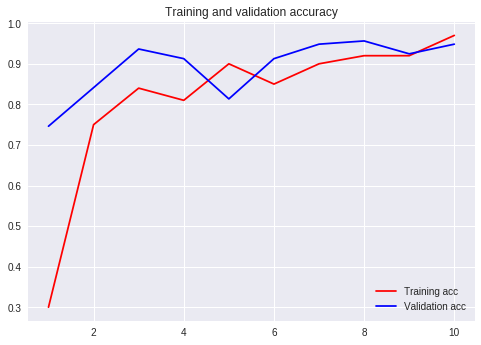

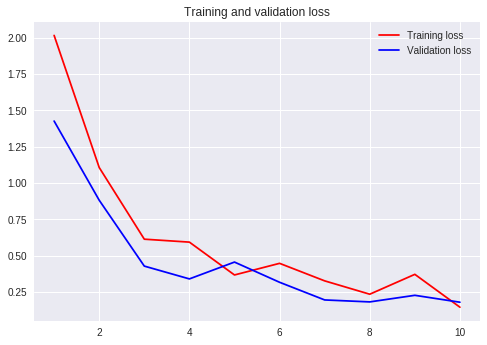

In [118]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

**FINE TUNING**

**Varying Nodes in FC layers**

In [0]:
from keras.applications import Xception
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout

# set  up the model
model4=Sequential()
# add xception pretrained model, the wieghts 80Mb
model4.add(Xception(include_top=False, 
                      pooling='avg', 
                      weights='xception_weights_tf_dim_ordering_tf_kernels_notop.h5'
                     ))
# use relu as activation function "vanishing gradiends" :)
model4.add(Dense(512, activation="relu"))  
# add drop out to avoid overfitting
model4.add(Dropout(0.5))
model4.add(Dense(256, activation="relu"))  
# add drop out to avoid overfitting
model4.add(Dropout(0.5))#Dropping a neuron with 0.5 probability gets the highest variance for this distribution. 
model4.add(Dense(num_classes, activation="softmax"))

****FREEZING Pretrained Layers****

In [0]:
# do not need to train the pre train layer
model4.layers[0].trainable=False

In [121]:
model4.layers[0].summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_14[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [122]:
model4.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 2048)              20861480  
_________________________________________________________________
dense_25 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                2570      
Total params: 22,044,466
Trainable params: 1,182,986
Non-trainable params: 20,861,480
________________________________________________________

**COMPILE MODEL**

In [0]:
# from keras import optimizers
# adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
# use adam to avoid overfitting

model4.compile(loss="categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])

**TRAIN MODEL**

In [124]:
  model4_history = model4.fit_generator(train_gen,
                                    steps_per_epoch=5,
                                    epochs=10,
                                    validation_data=val_gen,
                                    validation_steps=val_count // BATCH_SIZE)

Epoch 1/10
5/5 [==============================] - 49s 10s/step - loss: 2.4326 - acc: 0.0500 - val_loss: 2.2747 - val_acc: 0.1190
Epoch 2/10
5/5 [==============================] - 11s 2s/step - loss: 2.3744 - acc: 0.1100 - val_loss: 2.2499 - val_acc: 0.1865
Epoch 3/10
5/5 [==============================] - 11s 2s/step - loss: 2.2464 - acc: 0.2200 - val_loss: 2.2176 - val_acc: 0.2500
Epoch 4/10
5/5 [==============================] - 11s 2s/step - loss: 2.2283 - acc: 0.1600 - val_loss: 2.1856 - val_acc: 0.3175
Epoch 5/10
5/5 [==============================] - 11s 2s/step - loss: 2.2346 - acc: 0.1700 - val_loss: 2.1592 - val_acc: 0.4048
Epoch 6/10
5/5 [==============================] - 11s 2s/step - loss: 2.1499 - acc: 0.2200 - val_loss: 2.1067 - val_acc: 0.5476
Epoch 7/10
5/5 [==============================] - 12s 2s/step - loss: 2.1426 - acc: 0.2300 - val_loss: 2.1025 - val_acc: 0.5873
Epoch 8/10
5/5 [==============================] - 11s 2s/step - loss: 2.1083 - acc: 0.3175 - val_loss: 

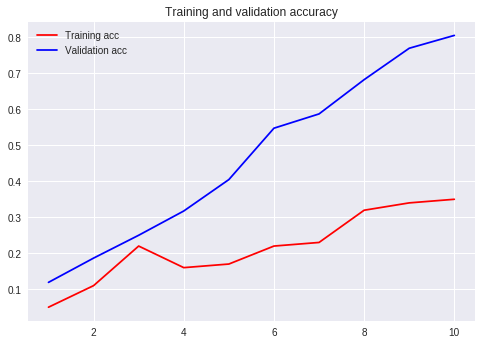

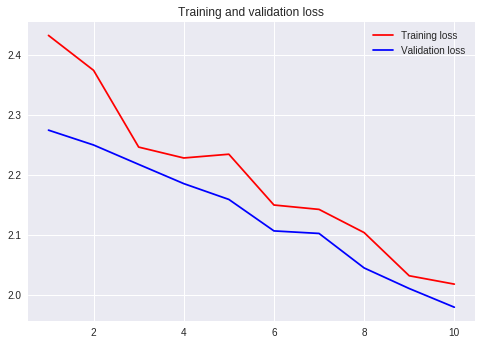

In [126]:
acc = model4_history.history['acc']
val_acc = model4_history.history['val_acc']
loss = model4_history.history['loss']
val_loss = model4_history.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

**REFERENCE**

[1]https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/10_Fine-Tuning.ipynb

[2]https://keras.io/applications/

[3]https://towardsdatascience.com/computer-vision-by-andrew-ng-11-lessons-learned-7d05c18a6999

[4]http://delivery.acm.org/10.1145/1280000/1273592/p759-raina.pdf?ip=155.33.134.9&id=1273592&acc=ACTIVE%20SERVICE&key=AA86BE8B6928DDC7%2EC2B8A117C7A71F5A%2E4D4702B0C3E38B35%2E4D4702B0C3E38B35&__acm__=1544804536_cd39e224c022a17455b90ca620506126
**